<a href="https://colab.research.google.com/github/DamodaraBarbosa/xbox_game_pass_analisys/blob/main/Publishers_Analisys_Xbox_Game_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Parâmetros do matplotlib

In [2]:
plt.rcParams['figure.figsize'] = (15, 9)
parametros = {'axes.labelsize': 25, 'axes.titlesize': 30}
plt.rcParams.update(parametros)

Importando a base de dados

In [3]:
data_gamepass = pd.read_csv('/content/drive/MyDrive/Dados Xbox/database_gamepass (1).csv')

In [4]:
data_gamepass.head()

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaN,Jan 2023,NaN,Role-Playing,Atlus,Sega,M,...,[''],Unreleased,-,-,0,0.0,NaN,-,NaN,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaN,Jan 2023,NaN,NaN,Atlus,Sega,M,...,[''],Unreleased,-,-,0,0.0,NaN,-,NaN,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaN,Dec 2022,NaN,First-Person Shooter,NaN,NaN,M,...,NaN,Unreleased,-,-,0,0.0,NaN,-,NaN,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaN,Dec 2022,NaN,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,[''],Unreleased,-,-,0,0.0,NaN,-,NaN,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaN,Nov 2022,NaN,Action,Fatshark,Fatshark,RP,...,['Optimized for Xbox Series X/S'],Unreleased,-,-,0,0.0,NaN,-,NaN,NaN


In [5]:
# há alguns dados duplicados:

data_gamepass[data_gamepass.duplicated('game')]

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
104,PACMAN MUSEUM,Xbox / PC,Active,"May 27, 2022",May 2022,NaN,Compilation / Platformer,NaN,NaN,E,...,NaN,"11,495","1,000",11.50,"44,713",0.3,40-50 hours,3.0,64,tbd
105,PACMAN MUSEUM,Xbox / PC,Active,"February 26, 2014",May 2022,NaN,Compilation / Platformer,NaN,NaN,E,...,NaN,"3,360",400,8.40,"3,232",0.8,NaN,3.3,64,5.2
106,PACMAN MUSEUM,Xbox / PC,Active,"May 27, 2022",May 2022,NaN,Compilation / Platformer,NaN,NaN,E,...,NaN,"3,360",400,8.40,"3,232",0.8,NaN,3.3,64,tbd
133,CRICKET 22,Xbox,Active,NaN,Apr 2022,NaN,Sports / Cricket,Big Ant Studios,Nacon,E,...,[''],"3,398","1,000",3.40,"7,396",1.9,20-25 hours,3.2,NaN,NaN
232,TAINTED GRAIL CONQUEST,PC,Active,NaN,Sep 2021,NaN,Role-Playing / Card Game,NaN,NaN,M,...,NaN,"3,280","1,000",3.28,"11,542",2.6,25-30 hours,3.6,NaN,NaN
398,TETRIS EFFECT CONNECTED,Xbox / PC,Active,"November 10, 2020",Nov 2020,NaN,Puzzle,MonstarsResonair,Enhance Games,E,...,"['Smart Delivery', 'Optimized for Xbox Series ...","6,527","1,000",6.53,"104,602",0.1,80-100 hours,4.1,88,7.8
885,MUTANT YEAR ZERO ROAD TO EDEN,Xbox / PC,Removed,"December 4, 2018",Dec 2018,Dec 2020,Strategy,The Bearded Ladies,Funcom,NaN,...,[],"5,366","1,470",3.65,"40,744",0.7,20-25 hours,4.0,80,8.0
946,OPUS MAGNUM,PC,Removed,NaN,Jun 2019,May 2020,Puzzle,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,N,Xbox,Removed,"October 4, 2017",Jun 2017,Aug 2019,Platformer,Slick Entertainment,Xbox Game Studios,NaN,...,"['Xbox Live Arcade', 'Xbox One Backward Compat...",452,200,2.26,"44,670",4.7,15-20 hours,3.7,88,5.6
1049,N,Xbox,Removed,"February 20, 2008",Jun 2017,Aug 2019,Platformer,Metanet Software,Metanet Software,NaN,...,[],452,200,2.26,"44,670",4.7,15-20 hours,3.7,83,8.4


In [6]:
# faz-se a remoção dos jogos duplicados:

data_gamepass.drop_duplicates('game', ignore_index= True, inplace= True)

In [7]:
data_gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          1180 non-null   object 
 1   system        1179 non-null   object 
 2   status        1179 non-null   object 
 3   release_date  739 non-null    object 
 4   added         1180 non-null   object 
 5   removed       635 non-null    object 
 6   genre         1175 non-null   object 
 7   developer     725 non-null    object 
 8   publisher     725 non-null    object 
 9   esrb          672 non-null    object 
 10  esrb content  590 non-null    object 
 11  addons        725 non-null    object 
 12  ta_score      910 non-null    object 
 13  gamerscore    910 non-null    object 
 14  ratio         910 non-null    object 
 15  gamers        910 non-null    object 
 16  comp_%        910 non-null    float64
 17  comp_time     835 non-null    object 
 18  rating        910 non-null  

In [8]:
# substitui onde houver publisher como Microsoft Studios para Xbox Game Studios:

data_gamepass.replace('Microsoft Studios', 'Xbox Game Studios', inplace= True)

In [9]:
# onde houver ',' em gamers será convertido para '':

for index, gamers in enumerate(data_gamepass['gamers']):
  try:
    data_gamepass.at[index, 'gamers'] = gamers.replace(',', '')
  except AttributeError:
    pass

# Análise exploratória das publishers no Xbox Game Pass

In [10]:
# todas as publishers presentes no serviço:

data_gamepass['publisher'].unique()

array(['Sega', nan, 'TinyBuild', 'Fatshark', 'Prime Matter', 'JumpShip',
       'Frictional Games', 'Ebb Software', 'THQ', 'Bethesda Softworks',
       'Ubisoft', 'CyberConnect2', 'Funcom', 'Electronic Arts',
       'Chorus Worldwide', 'Playdead', 'Xbox Game Studios',
       'Neowiz Games', 'Kalypso Media', 'Frozen District', 'Playism',
       'Deep Silver', 'Koei Tecmo', 'Nacon', 'Rebellion Developments',
       'Focus Home Interactive', 'Giants Software',
       'Frontier Developments', '505 Games', 'Epic Games',
       'Devolver Digital', 'Telltale Publishing', 'Square Enix',
       'Sony Interactive Entertainment', 'Annapurna Interactive',
       'Foam Punch', 'Metalhead Software', 'The Arcade Crew',
       'Dear Villagers', 'Neowiz', 'Outright Games', 'Compulsion Games',
       'Drinkbox Studios', 'Skookum Arts', 'Campo Santo', 'WB Games',
       'Thunderful', '20th Century Games', 'Bandai Namco Entertainment',
       'Curve Digital', 'Chucklefish', 'Avalanche Studios', 'Playstack

In [11]:
data_gamepass['status'].unique()

array(['Coming Soon', 'Active', nan, 'Removed'], dtype=object)

Análise do número de jogos por publisher

In [12]:
# a quantidade de jogos por publisher que estão ou estiveram no Xbox Game Pass:

games_per_publisher = data_gamepass.value_counts('publisher')
games_per_publisher

publisher
Xbox Game Studios     82
Electronic Arts       62
Square Enix           23
Capcom                22
Bethesda Softworks    20
                      ..
Hinterland Studio      1
Hudson Soft            1
Image & Form           1
Innersloth             1
tinyBuild              1
Length: 217, dtype: int64

In [13]:
# instanciando variável com as publishers com pelo 3 jogos inseridos no Xbox Game Pass:

publisher_with_at_least_3_games = games_per_publisher[games_per_publisher >= 3].keys()

In [14]:
# a quantidade de jogos ativos por publisher no Xbox Game Pass:

active_games_per_publisher = data_gamepass.query('status == "Active"').value_counts('publisher')
active_games_per_publisher

publisher
Xbox Game Studios     57
Electronic Arts       43
Bethesda Softworks    20
Sega                   9
Square Enix            7
                      ..
Giants Software        1
Gearbox Publishing     1
Funselektor Labs       1
Frozen District        1
tinyBuild              1
Length: 91, dtype: int64

In [15]:
# instanciando variável com as publishers com pelo 3 jogos ativos no Xbox Game Pass:

publisher_with_at_least_3_active_games = active_games_per_publisher[active_games_per_publisher >= 3].keys()

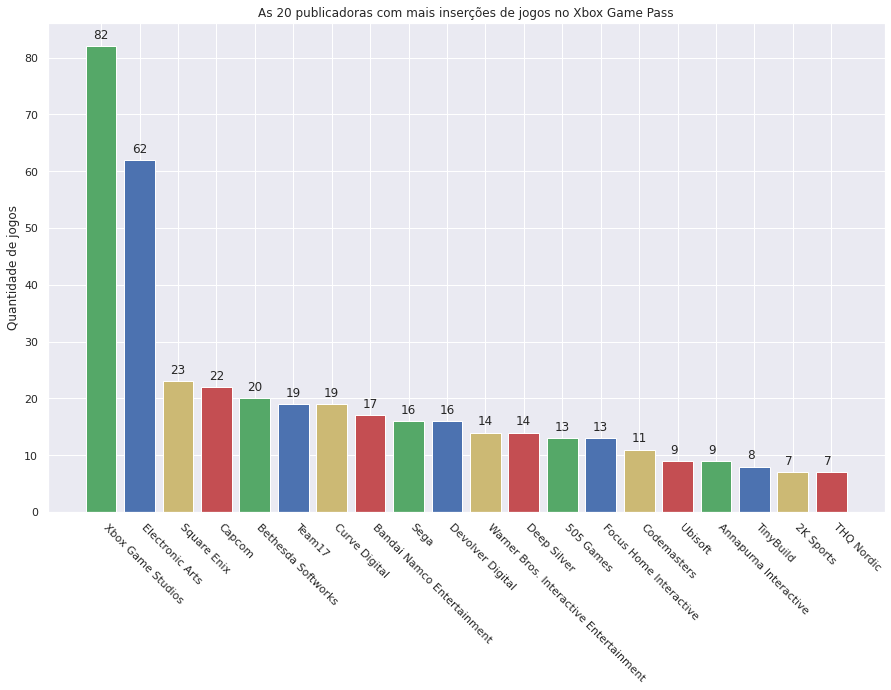

In [16]:
sns.set()

# gráfico com as inserções de jogos por publisher no Xbox Game Pass:

bars = plt.bar(games_per_publisher.keys()[:20], games_per_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

# para mostrar os valores no topo da barra:

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.8, value, va= 'bottom')

plt.xticks(rotation= '-45', ha= 'left')
plt.title('As 20 publicadoras com mais inserções de jogos no Xbox Game Pass')
plt.ylabel('Quantidade de jogos')
plt.show()


In [17]:
# jogos ativos, ou seja, que ainda estão no Game Pass:

active_games = data_gamepass.query('status == "Active"')
active_games_counts = active_games.value_counts('publisher')

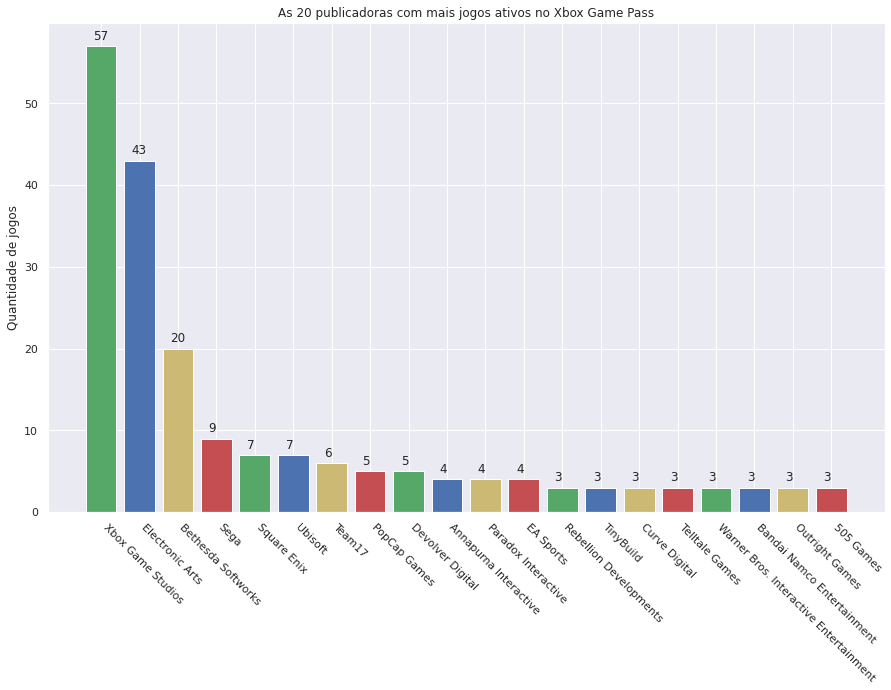

In [18]:
bars = plt.bar(active_games_counts.keys()[:20], active_games_counts.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.8, value)

plt.xticks(rotation= '-45', ha= 'left')
plt.title('As 20 publicadoras com mais jogos ativos no Xbox Game Pass')
plt.ylabel('Quantidade de jogos')
plt.show()

In [19]:
# instacia-se variável com dados dos jogos que foram removidos do serviço:

data_games_removed = data_gamepass.query('status == "Removed"')
data_games_removed.shape[0] # são 646 jogos removidos do Xbox Game Pass!

635

In [20]:
# para saber qual a publisher que mais retirou jogos do serviço:

publisher_removed_games = data_games_removed.value_counts('publisher')[:20]
publisher_removed_games

publisher
Xbox Game Studios                         25
Capcom                                    22
Electronic Arts                           19
Square Enix                               16
Curve Digital                             16
Bandai Namco Entertainment                14
Team17                                    13
Deep Silver                               12
Focus Home Interactive                    12
Devolver Digital                          11
Warner Bros. Interactive Entertainment    11
505 Games                                 10
Codemasters                                8
Raw Fury                                   7
2K Sports                                  7
THQ Nordic                                 6
Konami                                     5
Annapurna Interactive                      5
Sega                                       5
LucasArts                                  5
dtype: int64

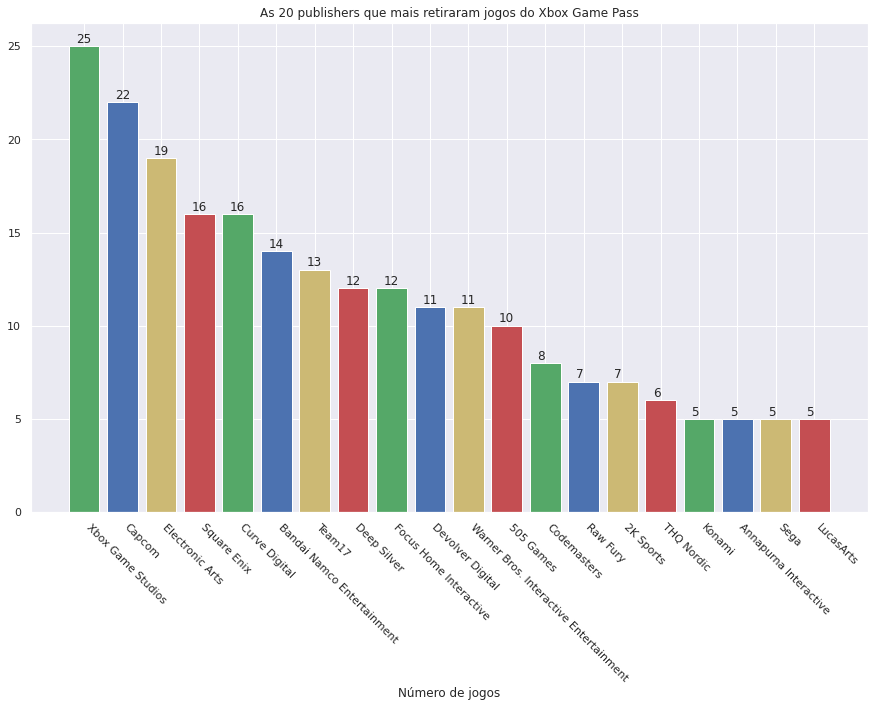

In [21]:
# gráfico com as publishers que mais retiraram jogos do Xbox Game Pass:

bars = plt.bar(publisher_removed_games.keys(), publisher_removed_games.values, color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.2, value)

plt.title('As 20 publishers que mais retiraram jogos do Xbox Game Pass')
plt.xlabel('Número de jogos') 
plt.xticks(rotation= '-45', ha= 'left')
plt.show()

In [22]:
# alguma publisher deixou de dar suporte ao Xbox Game Pass?

publisher_with_no_active_games = dict()
publishers_with_no_active_games = list()

all_games_per_publisher = data_gamepass.groupby('publisher')
active_games_per_publisher = data_gamepass.query('status == "Active"').groupby('publisher')

for key in all_games_per_publisher.groups.keys():
  if key not in active_games_per_publisher.groups:
    publisher_with_no_active_games['publisher'] = key
    publisher_with_no_active_games['insertions'] = len(all_games_per_publisher.groups[key])

    publishers_with_no_active_games.append(publisher_with_no_active_games.copy())

In [23]:
# tabela com as publishers que não dão mais suporte ao Xbox Game Pass que inseriram mais de um jogo no serviço:

publishers_with_no_active_games = pd.DataFrame(publishers_with_no_active_games)
publishers_with_no_active_games[publishers_with_no_active_games['insertions'] > 1
                                ].sort_values('insertions', ascending= False)

,publisher,insertions
24,Capcom,22
3,2K Sports,7
95,Raw Fury,7
1,2K Games,5
68,LucasArts,5
103,SNK,5
64,Konami,5
28,Clickteam,4
78,Namco Bandai Games,4
5,Adult Swim Games,4


Análise do número de jogadores (base do TrueAchievements) por publisher

In [24]:
# convertem-se os dados de gamers do TrueAchievements para float:

data_gamepass['gamers'] = data_gamepass['gamers'].astype(float, errors= 'ignore')

In [25]:
# as publishers com mais jogadores (pela base do True Achievements) nos seus jogos em números absolutos:

total_gamers_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_games').groupby('publisher')['gamers'].sum()
total_gamers_publisher = total_gamers_publisher.sort_values(ascending= False)
total_gamers_publisher

publisher
Xbox Game Studios                         13375820.0
Electronic Arts                            5435337.0
Square Enix                                2250193.0
Bethesda Softworks                         2107257.0
Warner Bros. Interactive Entertainment     1696500.0
Ubisoft                                    1614101.0
Capcom                                     1221509.0
Team17                                      988196.0
505 Games                                   876290.0
2K Games                                    829833.0
Bandai Namco Entertainment                  821936.0
Deep Silver                                 817076.0
LucasArts                                   730307.0
Curve Digital                               722040.0
Devolver Digital                            684686.0
Codemasters                                 628319.0
Sega                                        510453.0
Annapurna Interactive                       491747.0
EA Sports                           

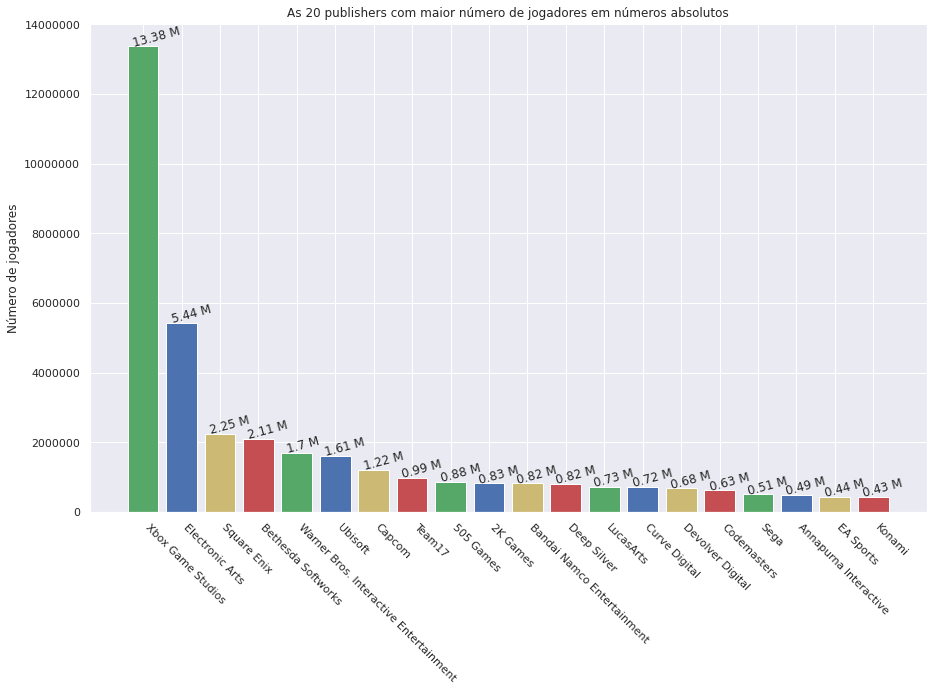

In [26]:
# gráfico com as publisher com maior número de jogadores (base do TrueAchievements) em números absolutos, contando todos os jogos inseridos no Xbox Game Pass:

bars = plt.bar(total_gamers_publisher.keys()[:20], total_gamers_publisher.values[:20], color= ['g', 'b', 'y', 'r'])
plt.xticks(rotation= '-45', ha= 'left')

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.1, value, f'{round(value/1000000, 2)} M', rotation= '15')


# para prevenir que os valores do eixo y sejam expressos em notação científica:
plt.title('As 20 publishers com maior número de jogadores em números absolutos')
plt.ylabel('Número de jogadores')
plt.ticklabel_format(style= 'plain', axis= 'y')
plt.show()

In [27]:
# instancia-se variável com o número absoluto de jogadores (base do TrueAchievements) por publisher em jogos ativos no Xbox Game Pass:

gamers_active_games_per_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_active_games and status == "Active"'
                                                        ).groupby('publisher')['gamers'].sum()
gamers_active_games_per_publisher = gamers_active_games_per_publisher.sort_values(ascending= False)
gamers_active_games_per_publisher

publisher
Xbox Game Studios                         11065995.0
Electronic Arts                            4030486.0
Bethesda Softworks                         2107257.0
Ubisoft                                    1221897.0
Warner Bros. Interactive Entertainment      567093.0
Square Enix                                 508783.0
Team17                                      506245.0
Curve Digital                               392688.0
Sega                                        373545.0
505 Games                                   341185.0
PopCap Games                                325954.0
Telltale Games                              288629.0
EA Sports                                   252748.0
Devolver Digital                            224869.0
TinyBuild                                   206710.0
Annapurna Interactive                       202224.0
Bandai Namco Entertainment                  192660.0
Rebellion Developments                      182747.0
Codemasters                         

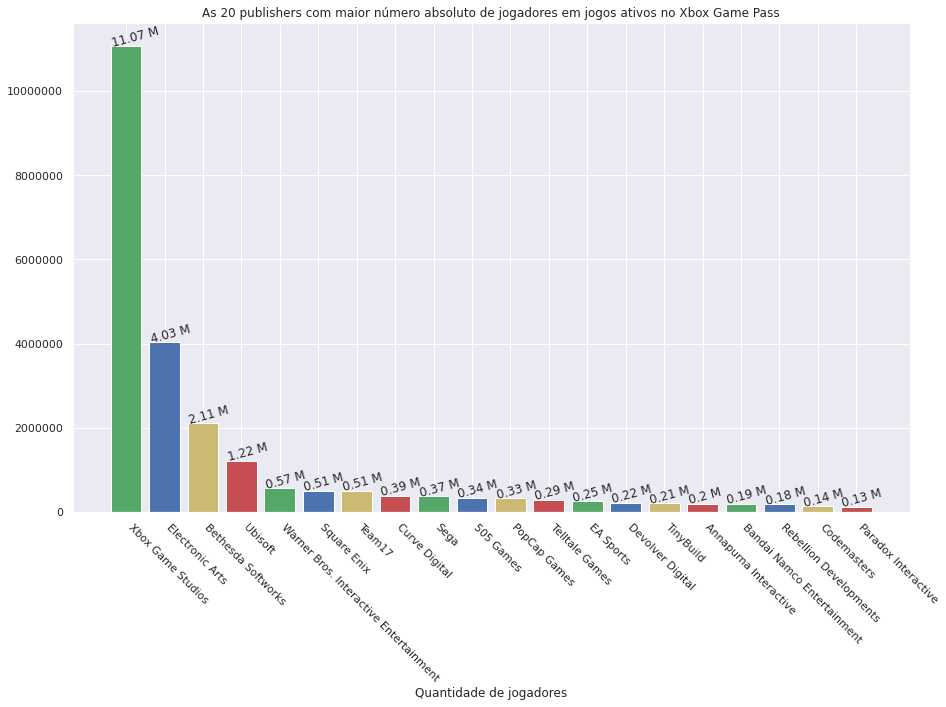

In [28]:
# gráfico com o número absoluto de jogadores (base do TrueAchievements) por publisher em jogos ativos no Xbox Game Pass:

bars = plt.bar(gamers_active_games_per_publisher.keys()[:20], gamers_active_games_per_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value, f'{round((value/1000000), 2)} M', rotation= '15')

plt.ticklabel_format(style= 'plain', axis= 'y')
plt.title('As 20 publishers com maior número absoluto de jogadores em jogos ativos no Xbox Game Pass')
plt.xticks(rotation= '-45', ha= 'left')
plt.xlabel('Quantidade de jogadores')
plt.show()

In [29]:
# média de jogadores (base do TrueAchievements) por publisher contanto todos os jogos inseridos no Xbox Game Pass:

mean_gamers_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_games').groupby('publisher')['gamers'].mean()
mean_gamers_publisher = mean_gamers_publisher.sort_values(ascending= False)

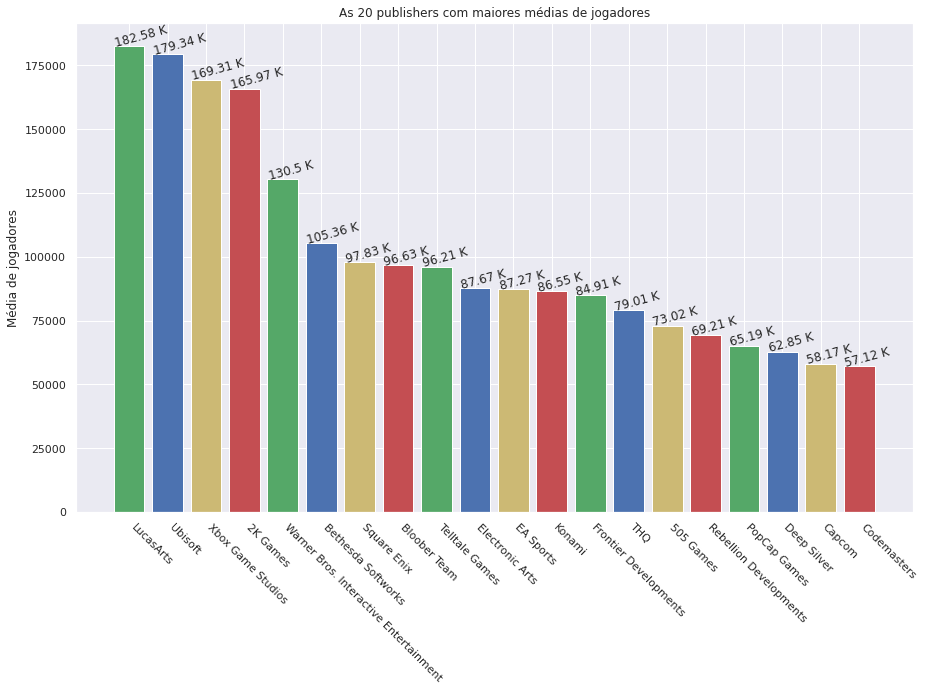

In [30]:
# gráfico com as publishers com maiores médias de jogadores:

bars = plt.bar(mean_gamers_publisher.keys()[:20], mean_gamers_publisher.values[:20], color= ['g','b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value, f'{round(value/1000, 2)} K', rotation= '15')

plt.xticks(rotation= '-45', ha= 'left')
plt.title('As 20 publishers com maiores médias de jogadores')
plt.ylabel('Média de jogadores')
plt.show()

In [31]:
# a média de jogadores (base do TrueAchievements) por publisher em jogos ativos no Xbox Game Pass:

mean_gamers_active_games_per_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_active_games and status == "Active"'
                                                            ).groupby('publisher')['gamers'].mean()
mean_gamers_active_games_per_publisher = mean_gamers_active_games_per_publisher.sort_values(ascending= False)
mean_gamers_active_games_per_publisher

publisher
Xbox Game Studios                         201199.909091
Warner Bros. Interactive Entertainment    189031.000000
Ubisoft                                   174556.714286
Curve Digital                             130896.000000
505 Games                                 113728.333333
Bethesda Softworks                        105362.850000
Telltale Games                             96209.666667
Electronic Arts                            93732.232558
Team17                                     84374.166667
EA Sports                                  84249.333333
Square Enix                                72683.285714
TinyBuild                                  68903.333333
Paradox Interactive                        65896.000000
PopCap Games                               65190.800000
Bandai Namco Entertainment                 64220.000000
Rebellion Developments                     60915.666667
Annapurna Interactive                      50556.000000
Sega                                  

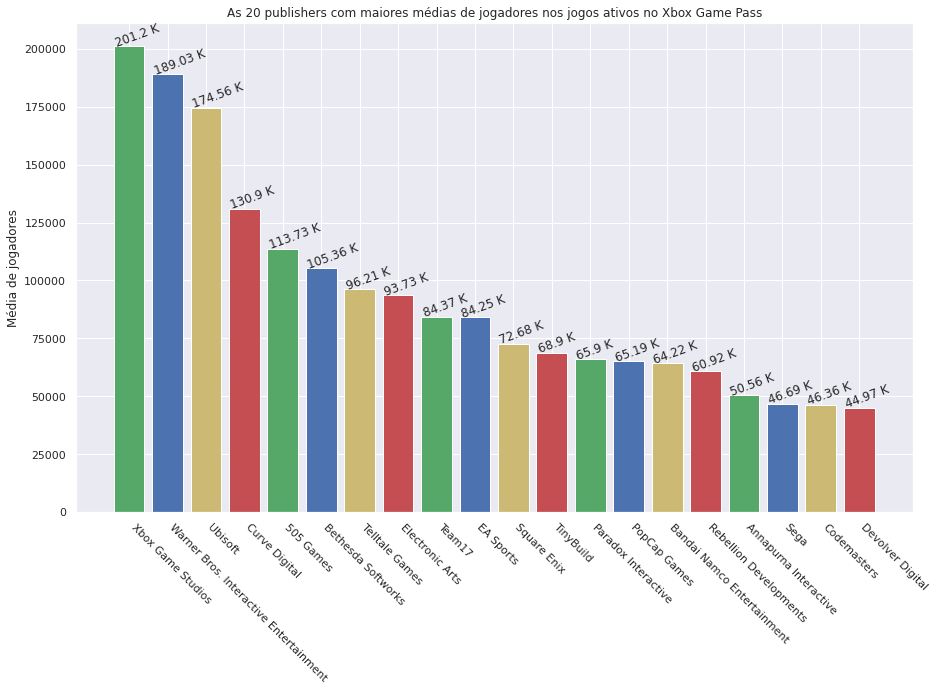

In [32]:
# gráfico com as publishers, com pelo menos 3 jogos ativos no serviço, com maiores médias de jogadores no Xbox Game Pass:

bars = plt.bar(mean_gamers_active_games_per_publisher.keys()[:20], mean_gamers_active_games_per_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value + 0.1, f'{round(value/1000, 2)} K', rotation= '20')

plt.title('As 20 publishers com maiores médias de jogadores nos jogos ativos no Xbox Game Pass')
plt.xticks(rotation= '-45', ha= 'left')
plt.ylabel('Média de jogadores')
plt.show()

Análise da taxa de completação dos jogos por publisher

In [33]:
# a partir de todos os jogos já inseridos no Xbox Game Pass:

comp_per_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_games').groupby('publisher')['comp_%'].mean()
comp_per_publisher = comp_per_publisher.sort_values(ascending= False)

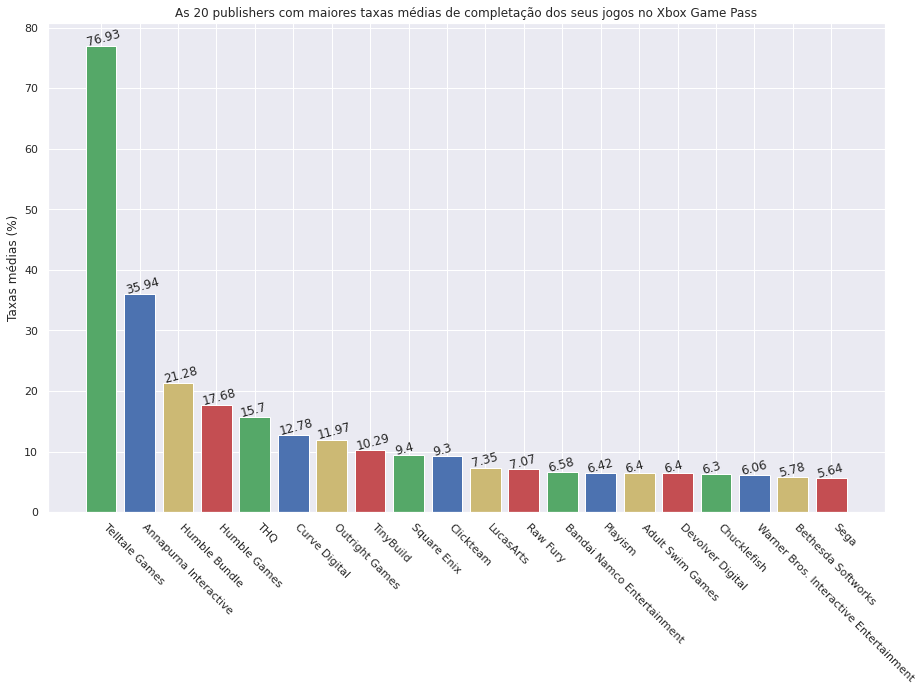

In [34]:
# gráfico com as 20 publishers, com pelo menos 3 jogos inseridos no serviço, com maiores taxas médias de completação dos jogos:

bars = plt.bar(comp_per_publisher.keys()[:20], comp_per_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value + 0.1, round(value, 2), rotation= '15')

plt.title('As 20 publishers com maiores taxas médias de completação dos seus jogos no Xbox Game Pass')
plt.ylabel('Taxas médias (%)')
plt.xticks(rotation= '-45', ha= 'left')
plt.show()

In [35]:
# para as publishers com jogos ativos:

comp_active_games_publisher = data_gamepass.query('status == "Active" and publisher in @publisher_with_at_least_3_active_games'
                                                  ).groupby('publisher')['comp_%'].mean()
comp_active_games_publisher = comp_active_games_publisher.sort_values(ascending= False)

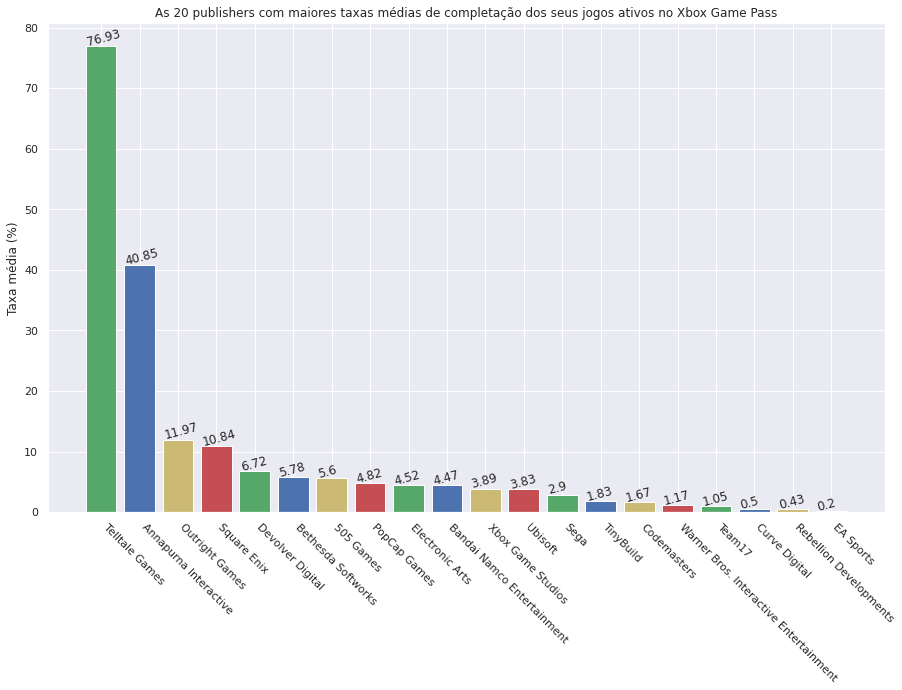

In [36]:
# gráfico com as publishers, com pelo menos 3 jogos ativos no serviço, com as maiores taxas médias de completação dos seus jogos ativos no Xbox Game Pass:

bars = plt.bar(comp_active_games_publisher.keys()[:20], comp_active_games_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value + 0.1, round(value, 2), rotation= '15')

plt.title('As 20 publishers com maiores taxas médias de completação dos seus jogos ativos no Xbox Game Pass')
plt.ylabel('Taxa média (%)')
plt.xticks(rotation= '-45', ha= 'left')
plt.show()

Análise das avaliações no TrueAchievements por publisher

In [38]:
# convertendo a coluna 'rating' de str para float:

for index, rating in enumerate(data_gamepass['rating']):
  try:
    data_gamepass.at[index, 'rating'] = float(rating)
  except ValueError:
    data_gamepass.at[index, 'rating'] = None

In [39]:
# os valores únicos da coluna 'rating':

data_gamepass['rating'].unique()

array([None, nan, 3.8, 4.1, 4.5, 4.2, 2.4, 3.7, 4.3, 4.4, 3.0, 3.1, 2.8,
       3.4, 2.5, 2.2, 4.0, 2.7, 3.6, 4.6, 3.2, 3.9, 3.5, 3.3, 2.6, 4.8,
       2.9, 2.0, 4.7, 2.3], dtype=object)

In [40]:
rating_per_publisher = data_gamepass.query('publisher in @publisher_with_at_least_3_games').groupby('publisher')['rating'].mean()
rating_per_publisher = rating_per_publisher.sort_values(ascending= False)
rating_per_publisher

publisher
2K Games                                  4.360000
Sega                                      4.081818
Square Enix                               4.078261
Chucklefish                               4.066667
Warner Bros. Interactive Entertainment    4.061538
Ubisoft                                   4.033333
Bethesda Softworks                        4.010000
11 Bit Studios                            4.000000
Frontier Developments                     4.000000
Telltale Games                            4.000000
Versus Evil                               3.866667
Rebellion Developments                    3.850000
THQ Nordic                                3.814286
Xbox Game Studios                         3.788462
Capcom                                    3.752632
Jackbox Games                             3.733333
Paradox Interactive                       3.725000
THQ                                       3.725000
Codemasters                               3.700000
LucasArts            

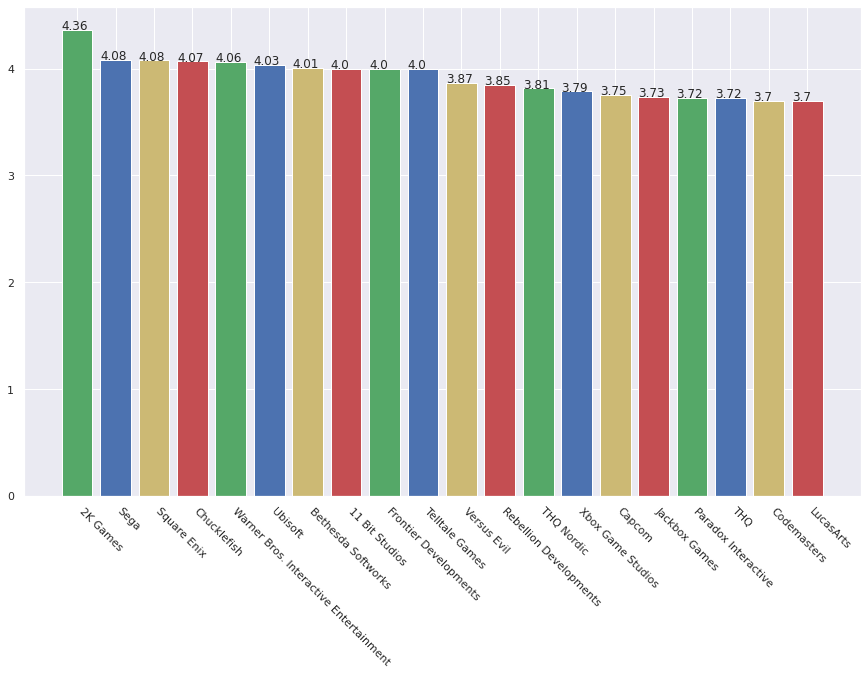

In [41]:
bars = plt.bar(rating_per_publisher.keys()[:20], rating_per_publisher.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value, round(value, 2))

plt.xticks(rotation= '-45', ha= 'left')
plt.show()

In [42]:
rating_per_publisher_active_games = data_gamepass.query('status == "Active" and publisher in @publisher_with_at_least_3_active_games'
                                                        ).groupby('publisher')['rating'].mean()
rating_per_publisher_active_games = rating_per_publisher_active_games.sort_values(ascending= False)
rating_per_publisher_active_games

publisher
Sega                                      4.357143
Warner Bros. Interactive Entertainment    4.300000
Ubisoft                                   4.100000
Bethesda Softworks                        4.010000
Telltale Games                            4.000000
Bandai Namco Entertainment                3.966667
Square Enix                               3.928571
Paradox Interactive                       3.900000
Codemasters                               3.866667
Rebellion Developments                    3.866667
Xbox Game Studios                         3.827778
505 Games                                 3.733333
Electronic Arts                           3.721429
Team17                                    3.716667
EA Sports                                 3.566667
Curve Digital                             3.466667
PopCap Games                              3.440000
Devolver Digital                          3.440000
Annapurna Interactive                     3.375000
TinyBuild            

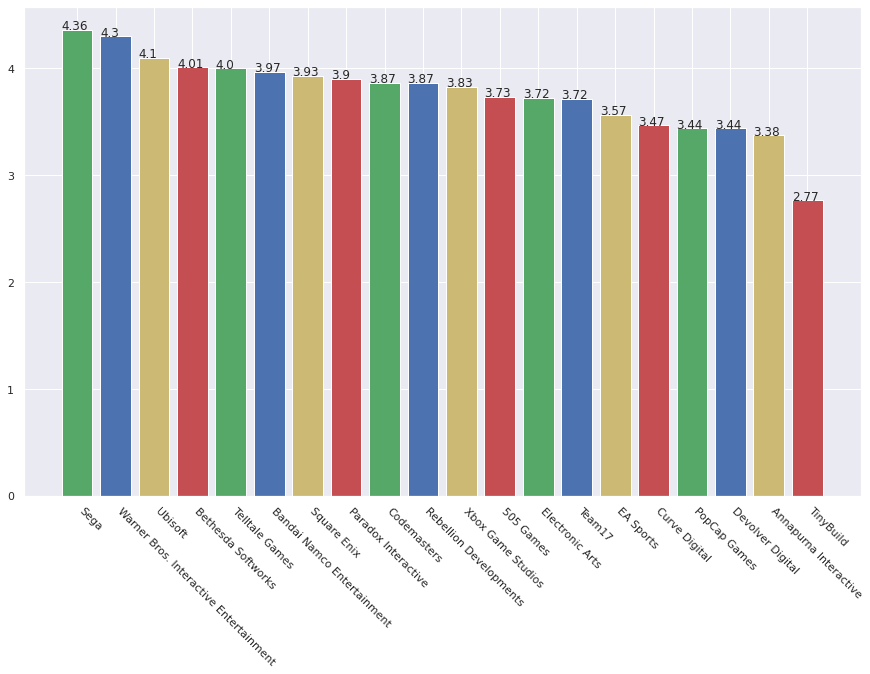

In [43]:
bars = plt.bar(rating_per_publisher_active_games.keys()[:20], rating_per_publisher_active_games.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value, round(value, 2))

plt.xticks(rotation= '-45', ha= 'left')
plt.show()

Análise das notas do Metacritic por publisher

In [44]:
# convertendo os dados de Metascore para float: 

for index, metascore in enumerate(data_gamepass['metascore']):
  try:
    data_gamepass.at[index, 'metascore'] = float(metascore)
  except ValueError:
    data_gamepass.at[index, 'metascore'] = None

In [45]:
# variável com os jogos sem nota no Metascore e que não possuem o status 'Coming Soon':

data_gamepass_copy = data_gamepass[:] # a modificação é feita em uma cópia do dataframe para que ele não seja alterado
data_gamepass_copy['metascore'].fillna(data_gamepass['metascore'].median(), inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [46]:
# instanciando variável com as publisher com mais de 3 jogos no serviço e com melhores médias de Metascore:

publisher_mean_metascore = data_gamepass_copy.query('publisher in @publisher_with_at_least_3_games').groupby('publisher')['metascore'].mean()
publisher_mean_metascore = publisher_mean_metascore.sort_values(ascending= False)

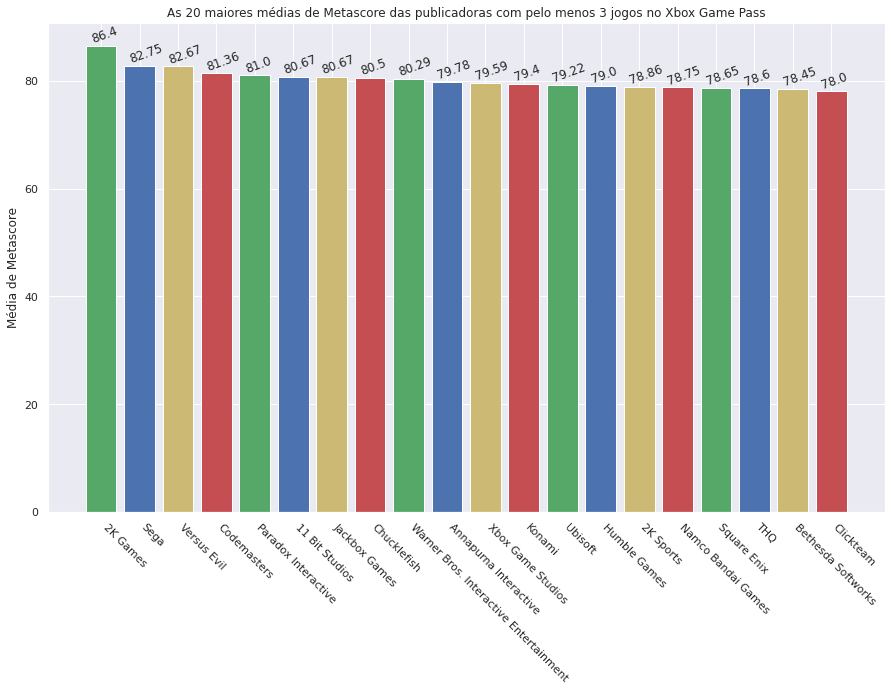

In [47]:
# gráfico com as média de Metascore entre as publisher com pelo menos 3 jogos no Xbox Game Pass:

bars = plt.bar(publisher_mean_metascore.keys()[:20], publisher_mean_metascore.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.1, value + 0.6, round(value, 2), rotation= '20')

plt.title('As 20 maiores médias de Metascore das publicadoras com pelo menos 3 jogos no Xbox Game Pass')
plt.xticks(rotation= '-45', ha= 'left')
plt.ylabel('Média de Metascore')
plt.show()

In [48]:
# instancia-se variável com a média do metascore dos jogos ativos para cada publisher com pelo menos 3 jogos ativos no Xbox Game Pass:

publisher_mean_metascore_active_games = data_gamepass_copy.query('publisher in @publisher_with_at_least_3_active_games and status == "Active"'
                                                                ).groupby('publisher')['metascore'].mean()
publisher_mean_metascore_active_games = publisher_mean_metascore_active_games.sort_values(ascending= False)
publisher_mean_metascore_active_games

publisher
Warner Bros. Interactive Entertainment    85.000000
Sega                                      84.888889
Codemasters                               84.666667
Annapurna Interactive                     81.750000
Paradox Interactive                       81.250000
Ubisoft                                   80.142857
Bandai Namco Entertainment                79.666667
Xbox Game Studios                         78.771930
Bethesda Softworks                        78.450000
Telltale Games                            78.000000
Rebellion Developments                    77.666667
PopCap Games                              77.200000
Devolver Digital                          76.600000
Electronic Arts                           76.348837
Team17                                    76.333333
EA Sports                                 76.250000
Outright Games                            75.666667
Square Enix                               75.285714
505 Games                                 71.333333
Cu

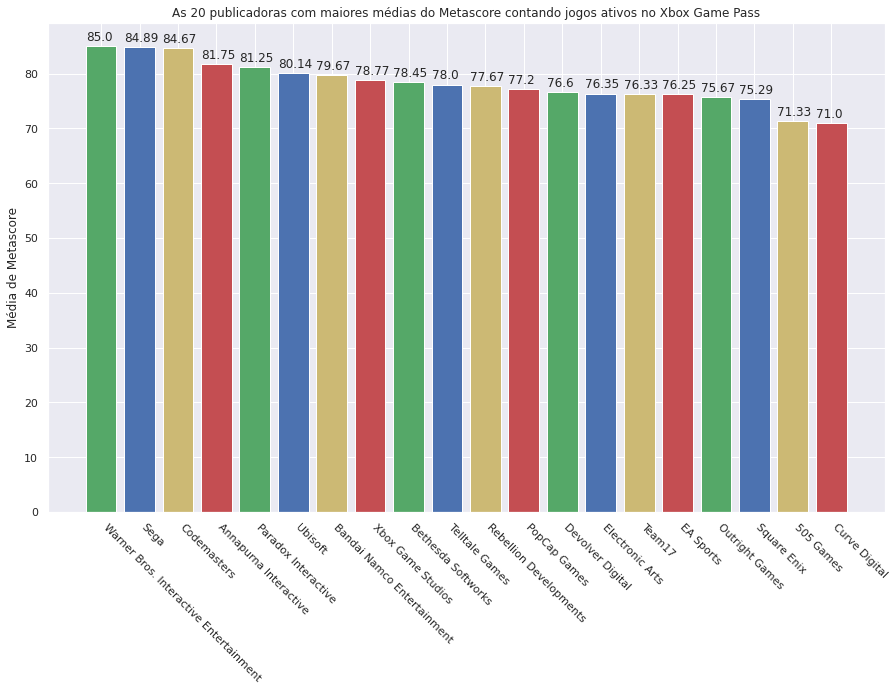

In [49]:
# gráfico com as 20 publishers, com pelo menos 3 jogos ativos no Xbox Game Pass, com maiores médias
# no Metascore 

bars = plt.bar(publisher_mean_metascore_active_games.keys()[:20], publisher_mean_metascore_active_games.values[:20], color= ['g', 'b', 'y', 'r'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value + 1, round(value, 2))

plt.title('As 20 publicadoras com maiores médias do Metascore contando jogos ativos no Xbox Game Pass')
plt.xticks(rotation= '-45', ha= 'left')
plt.ylabel('Média de Metascore')
plt.show()